<a href="https://colab.research.google.com/github/sabinedaher20-spec/DataScience-GenAI-Submissions-/blob/main/students_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To begin i asked Gemini to "Load the xlsx file into a pandas DataFrame and display the first 5 rows" to understand the data structure

In [2]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('/content/students_two.xlsx')

# Display the first 5 rows of the DataFrame
display(df.head())

,Id,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,5001,21,Other,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,5002,20,Other,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,5003,21,State,0.5,No,No,Private,2,Never,No,No,No,Yes,AA
3,5004,18,Private,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,5005,22,Private,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


My code displayed the first 5 rows and 13 columns: "Student_Age", "High_School_Type", "Scholarship", "Additional_Work", "Sports_activity", "Transportation", "Weekly_Study_Hours", "Attendance", "Reading", "Notes", "Listening_in_Class", "Project_work", "Grad"

I then askes Gemini to "Show dataset info, shape, and quick stats." to help me understandtnd the data better

In [3]:
# Display dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  145 non-null    int64  
 1   Student_Age         145 non-null    int64  
 2   High_School_Type    145 non-null    object 
 3   Scholarship         144 non-null    float64
 4   Additional_Work     145 non-null    object 
 5   Sports_activity     145 non-null    object 
 6   Transportation      145 non-null    object 
 7   Weekly_Study_Hours  145 non-null    int64  
 8   Attendance          145 non-null    object 
 9   Reading             145 non-null    object 
 10  Notes               145 non-null    object 
 11  Listening_in_Class  145 non-null    object 
 12  Project_work        145 non-null    object 
 13  Grade               145 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 16.0+ KB


xxx

In [4]:
# Display the shape of the DataFrame
print("\nDataset Shape:")
display(df.shape)


Dataset Shape:


(145, 14)

xxx

In [5]:
# Display quick statistics for numerical columns
print("\nQuick Statistics:")
display(df.describe())


Quick Statistics:


,Id,Student_Age,Scholarship,Weekly_Study_Hours
count,145.000000,145.000000,144.000000,145.000000
mean,5073.000000,19.682759,0.647569,2.331034
std,42.001984,1.992010,0.194804,4.249273
min,5001.000000,18.000000,0.250000,0.000000
25%,5037.000000,18.000000,0.500000,0.000000
50%,5073.000000,19.000000,0.500000,0.000000
75%,5109.000000,21.000000,0.750000,2.000000
max,5145.000000,26.000000,1.000000,12.000000


xxx

I then asked Gemini to "Drop columns that will not help predict the target variable (for example ID or purely identifying fields)"

In [7]:
# Drop the 'Id' column
df = df.drop(columns=['Id'])

print("DataFrame after dropping 'Id' column:")
display(df.head())

DataFrame after dropping 'Id' column:


,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,0.5,Yes,No,Private,0,Always,Yes,Yes,No,No,AA
1,20,Other,0.5,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA
2,21,State,0.5,No,No,Private,2,Never,No,No,No,Yes,AA
3,18,Private,0.5,Yes,No,Bus,2,Always,No,Yes,No,No,AA
4,22,Private,0.5,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA


I can now confrirm that the colummn ID was removed. However i can see that there are YES/NO and i want to change this to binary codes "Convert all Yes/No type columns to 1/0 where Yes=1 and No=0"

In [9]:
# Identify 'Yes'/'No' columns and convert them to binary (1/0)
for col in df.columns:
    if df[col].dtype == 'object':
        # Check if 'Yes' or 'No' are present in the column's unique values
        unique_values = df[col].unique()
        if 'Yes' in unique_values or 'No' in unique_values:
            # Apply replacement only for 'Yes' and 'No', leaving other values untouched
            df[col] = df[col].replace({'Yes': 1, 'No': 0})

print("DataFrame after converting 'Yes'/'No' columns to binary:")
display(df.head())

DataFrame after converting 'Yes'/'No' columns to binary:


/tmp/ipython-input-497524845.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0})


,Student_Age,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade
0,21,Other,0.5,1,0,Private,0,Always,1,1,0,0,AA
1,20,Other,0.5,1,0,Private,0,Always,1,0,1,1,AA
2,21,State,0.5,0,0,Private,2,Never,0,0,0,1,AA
3,18,Private,0.5,1,0,Bus,2,Always,0,1,0,0,AA
4,22,Private,0.5,0,0,Bus,12,Always,1,0,1,1,AA


 Plot histograms for all numeric features.

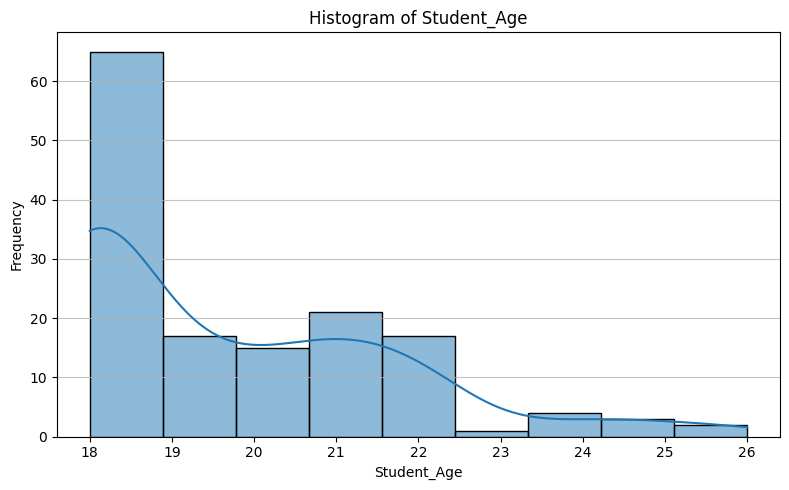

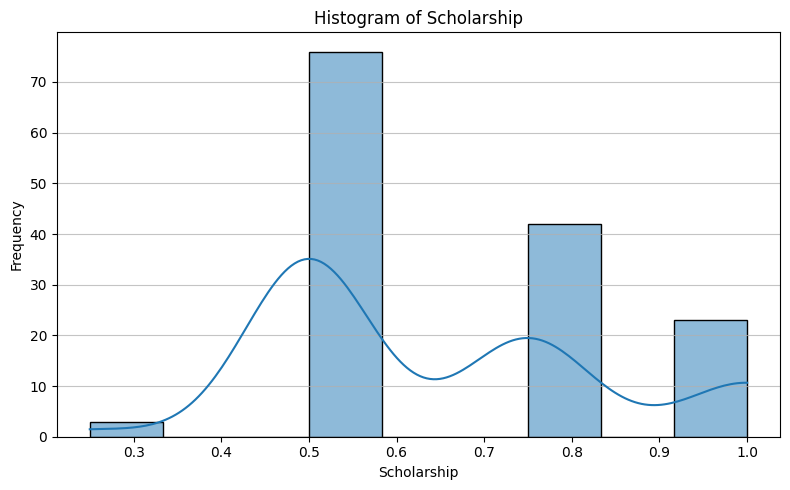

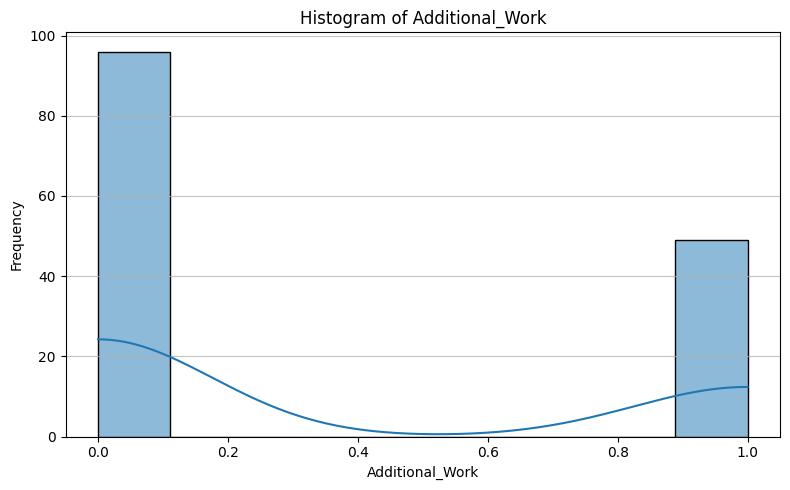

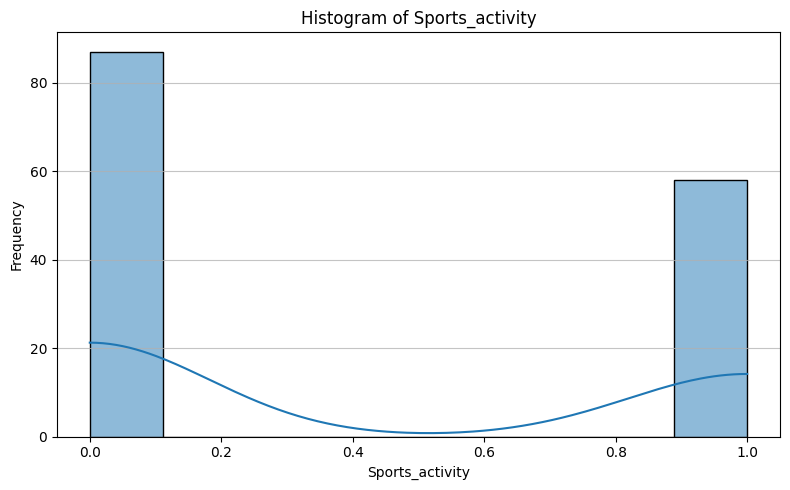

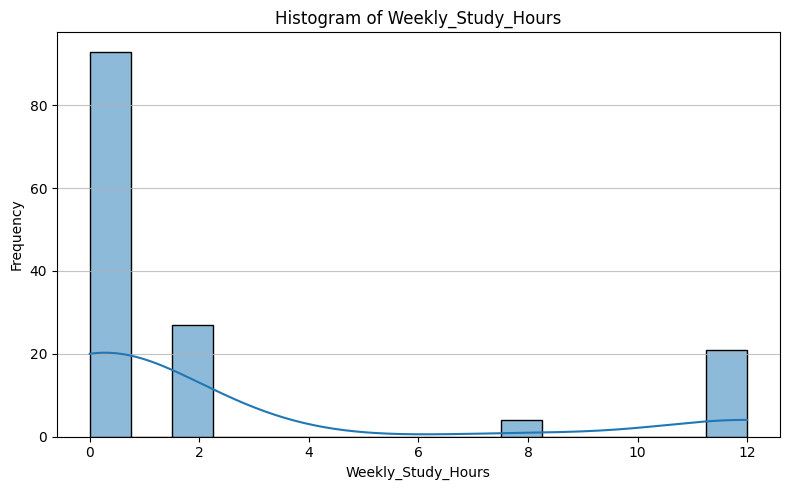

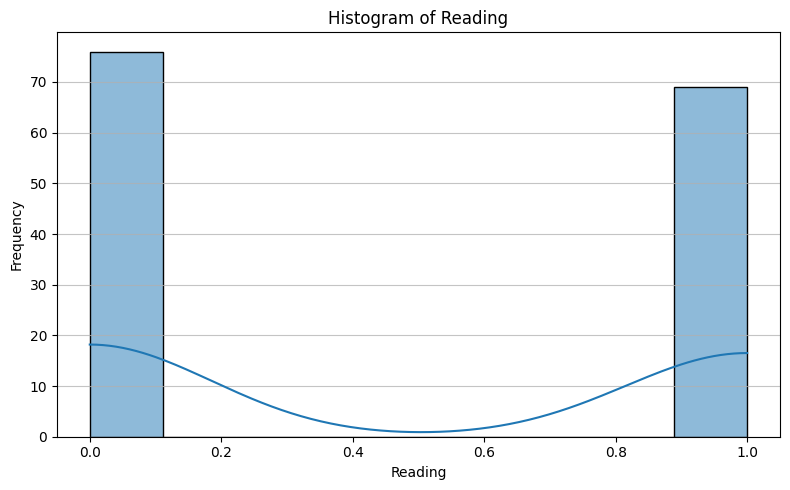

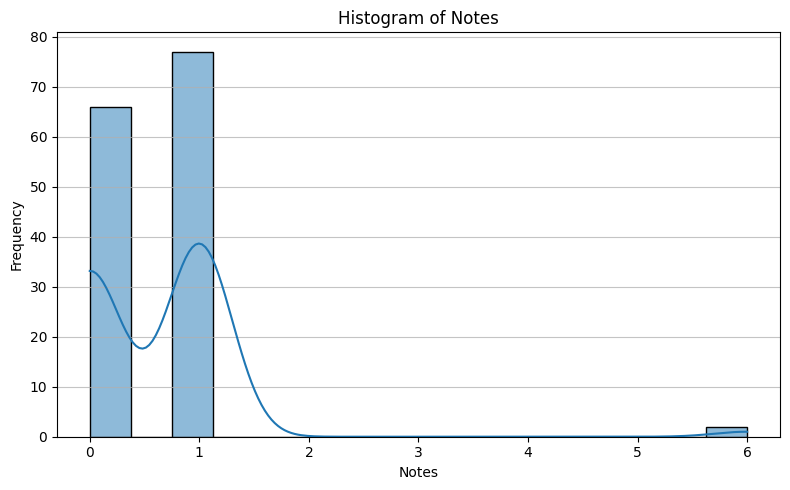

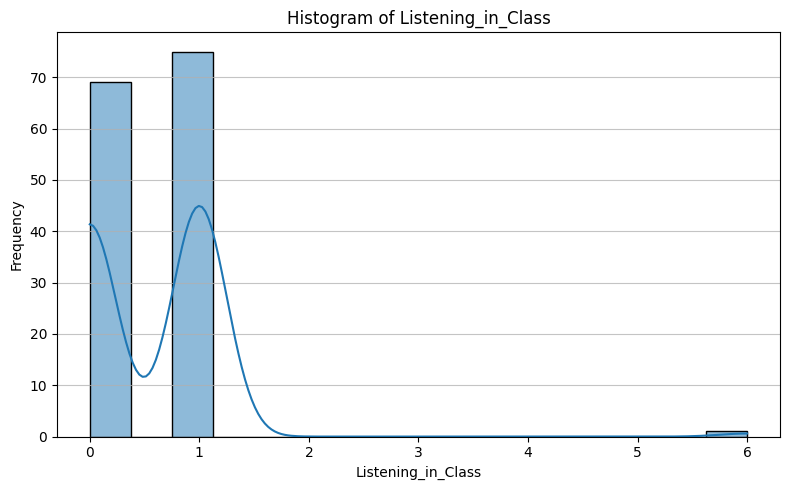

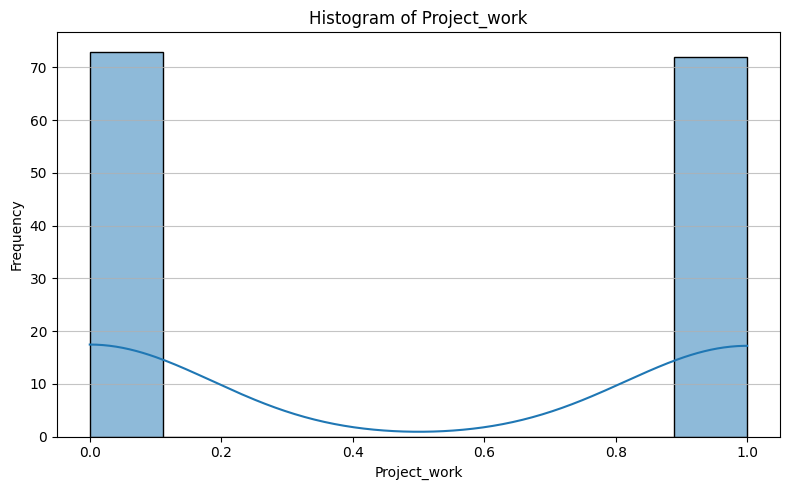

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for plotting histograms
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()